# EE-411, HomeWork 2 : Classifying digits & learning theory
### Yassin Alnuaimee 326279  EL-MA1

In [51]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler

digits=load_digits()

##  Classifying digits with Scikit-learn

## 1) Import and prepare the data

In [52]:
X,y=load_digits(return_X_y=True)

In [53]:
print(y)
y=np.where(y%2==0, 0, 1)
print(y)

[0 1 2 ... 8 9 8]
[0 1 0 ... 0 1 0]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#statify to ensure that the proportion of 0s and 1s in both the training and testing sets are similar to the proportion in the original dataset

In [55]:
# Calculate proportions in the training set
proportion_0_train = np.sum(y_train == 0) / len(y_train)
proportion_1_train = np.sum(y_train == 1) / len(y_train)

# Calculate proportions in the testing set
proportion_0_test = np.sum(y_test == 0) / len(y_test)
proportion_1_test = np.sum(y_test == 1) / len(y_test)

# Print the proportions
print(f"Training set - Proportion of 0s: {proportion_0_train}, Proportion of 1s: {proportion_1_train}")
print(f"Testing set - Proportion of 0s: {proportion_0_test}, Proportion of 1s: {proportion_1_test}")


Training set - Proportion of 0s: 0.49562450278440734, Proportion of 1s: 0.5043754972155927
Testing set - Proportion of 0s: 0.4962962962962963, Proportion of 1s: 0.5037037037037037


## 2)Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)

# Evaluate accuracy
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"Logistic Regression with L2 penalty Accuracy: {accuracy_l2}")


Logistic Regression with L2 penalty Accuracy: 0.9203703703703704


c:\Users\Yass La Menace\anaconda3\envs\Coding\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')  # 'liblinear' works well with L1
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)

# Evaluate accuracy
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Logistic Regression with L1 penalty Accuracy: {accuracy_l1}")


Logistic Regression with L1 penalty Accuracy: 0.9185185185185185


In [59]:
def neg_rss(reg, X, y):
    yp = reg.predict(X)
    return -np.mean(np.power(y - yp,2))

We observe that the logistic regression with l2 penalty give a better score than the logistic regression with l1 penalty

In [60]:
import matplotlib.pyplot as plt

The accuracy of the Logistic Regression with l2 loss and optimal parameter C is 0.9185185185185185
The optimal parameter C is 0.005738441648302393, thus the optimal lambda is 174.26333860096506


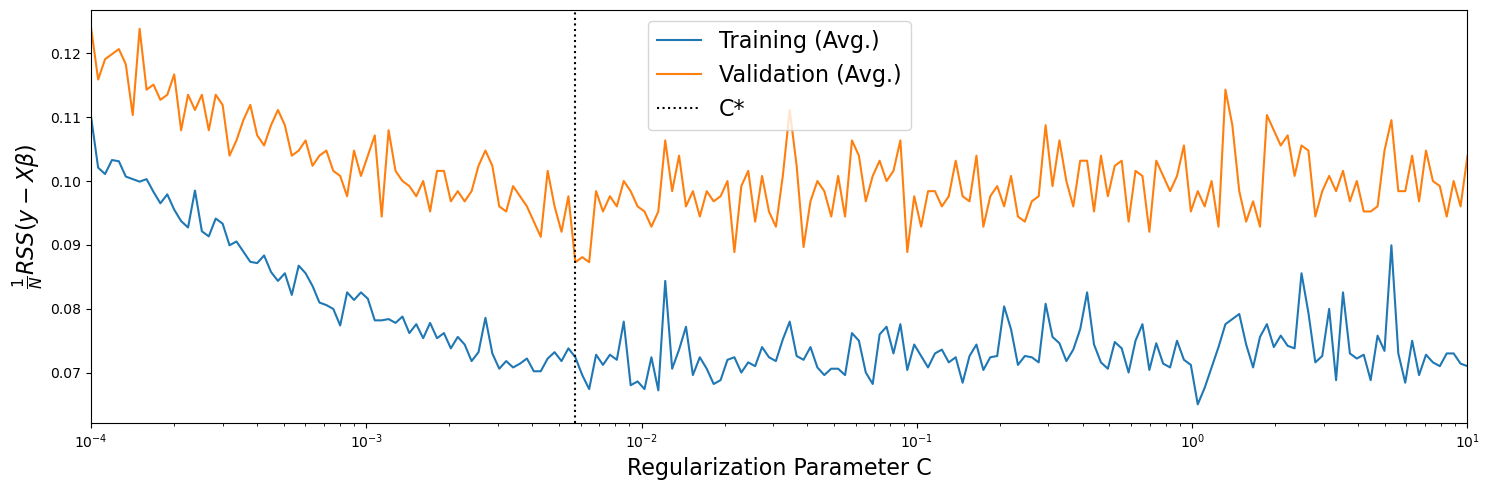

In [61]:
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

log_reg_l2= LogisticRegression(C=1e-3, multi_class='multinomial', penalty='l2', solver='sag', tol=0.1)

param_grid = [{'C': np.logspace(-4,1,200)}]

cv_l2 = GridSearchCV(log_reg_l2, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_l2.fit(X_train,y_train)

cvOptC = cv_l2.cv_results_['param_C'][cv_l2.best_index_]
testedC = cv_l2.cv_results_['param_C']
trainScores = -cv_l2.cv_results_['mean_train_score']   
testScores = -cv_l2.cv_results_['mean_test_score']  

plt.figure(figsize=(15,5))
plt.plot(testedC, trainScores, '-', label='Training (Avg.)')
plt.plot(testedC, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter C', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptC, label='C*', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([1e-4, 1e1])
plt.tight_layout()
plt.legend(loc='best', fontsize=16)

log_reg_l2_opt = LogisticRegression(C=cvOptC, multi_class='multinomial', penalty='l2', solver='sag', tol=0.1)

log_reg_l2_opt.fit(X_train,y_train)

score_l2_opt = log_reg_l2_opt.score(X_test,y_test)

print(f'The accuracy of the Logistic Regression with l2 loss and optimal parameter C is {score_l2_opt}') 
print(f'The optimal parameter C is {cvOptC}, thus the optimal lambda is {1/cvOptC}') 

The accuracy of the Logistic Regression with l1 loss and optimal parameter C is 0.9296296296296296
The optimal parameter C is 0.06517339604882427, thus the optimal lambda is 15.343684089300115


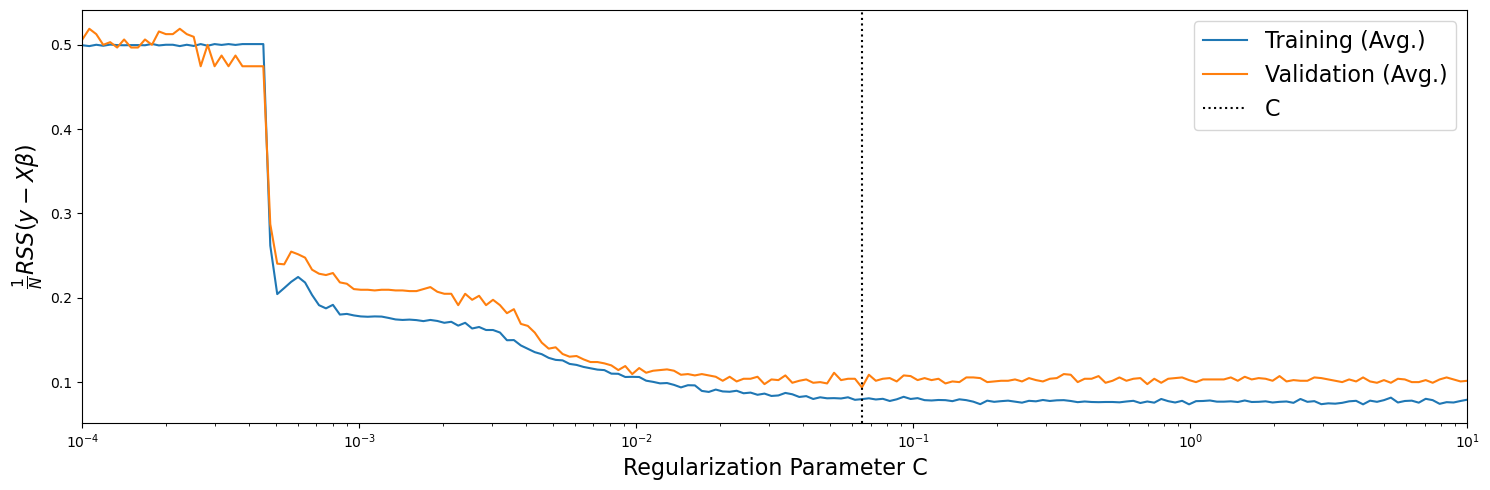

In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
log_reg_l1 = LogisticRegression(C=1e-3,multi_class='auto',penalty='l1', solver='saga', tol=0.1)

param_grid = [{'C': np.logspace(-4,1,200)}]
cv_l1 = GridSearchCV(log_reg_l1, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_l1.fit(X_train,y_train)

cvOptC = cv_l1.cv_results_['param_C'][cv_l1.best_index_]
testedC = cv_l1.cv_results_['param_C']
trainScores = -cv_l1.cv_results_['mean_train_score']   
testScores = -cv_l1.cv_results_['mean_test_score']    

plt.figure(figsize=(15,5))
plt.plot(testedC, trainScores, '-', label='Training (Avg.)')
plt.plot(testedC, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter C', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptC, label='C', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([1e-4, 1e1])
plt.tight_layout()
plt.legend(loc='best', fontsize=16)

log_reg_l1_opt = LogisticRegression(C=cvOptC,multi_class='auto',penalty='l1', solver='saga', tol=0.1)

log_reg_l1_opt.fit(X_train,y_train)

score_l1_opt = log_reg_l1_opt.score(X_test,y_test)

print(f'The accuracy of the Logistic Regression with l1 loss and optimal parameter C is {score_l1_opt}') 
print(f'The optimal parameter C is {cvOptC}, thus the optimal lambda is {1/cvOptC}') 

## 3)Ridge and Hinge

In [63]:
from sklearn import linear_model

In [64]:
regRR = linear_model.Ridge(alpha=0.01)

regRR.fit(X_train, y_train)
accuracy_RR = regRR.score(X_test,y_test)

print(f"Ridge regression Accuracy: {accuracy_RR}")

Ridge regression Accuracy: 0.6597838152532722


The accuracy of the Ridge Classifier with optimal alpha is 0.912962962962963
The optimal alpha is 488.02515836544336


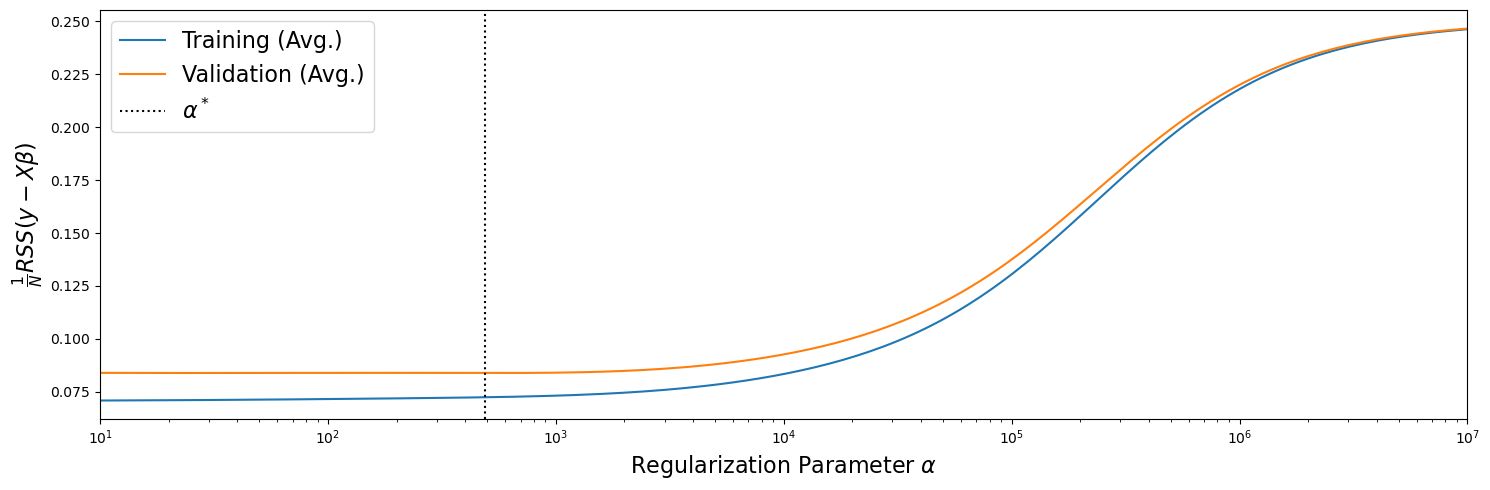

In [66]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

param_grid = [{'alpha': np.logspace(1,7,200)}]

cv_regRR = GridSearchCV(regRR, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_regRR.fit(X_train,y_train)

cvOptAlpha = cv_regRR.cv_results_['param_alpha'][cv_regRR.best_index_]
testedAlpha = cv_regRR.cv_results_['param_alpha']
trainScores = -cv_regRR.cv_results_['mean_train_score'] 
testScores = -cv_regRR.cv_results_['mean_test_score']     

plt.figure(figsize=(15,5))
plt.plot(testedAlpha, trainScores, '-', label='Training (Avg.)')
plt.plot(testedAlpha, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter $\\alpha$', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptAlpha, label='$\\alpha^*$', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([10, 1e7])
plt.tight_layout()
plt.legend(loc=2, fontsize=16)

log_regRR_opt = linear_model.RidgeClassifier(alpha=cvOptAlpha)

log_regRR_opt.fit(X_train,y_train)
score_regRR_opt = log_regRR_opt.score(X_test,y_test)
print(f'The accuracy of the Ridge Classifier with optimal alpha is {score_regRR_opt}') 
print(f'The optimal alpha is {cvOptAlpha}')

In [67]:
from sklearn import svm

In [73]:
regSVC_fixed = svm.LinearSVC(C=0.001,max_iter=1000000)
regSVC_fixed.fit(X_train,y_train)
score_regSVC_fixed = regSVC_fixed.score(X_test,y_test)
print(f'The accuracy of the Hinge Classifier is {score_regSVC_fixed}')

The accuracy of the Hinge Classifier is 0.9222222222222223


The accuracy of the Hinge Classifier and optimal parameter C is 0.9222222222222223
The optimal parameter C is 0.0020235896477251557, thus the optimal lambda is 494.1713361323838


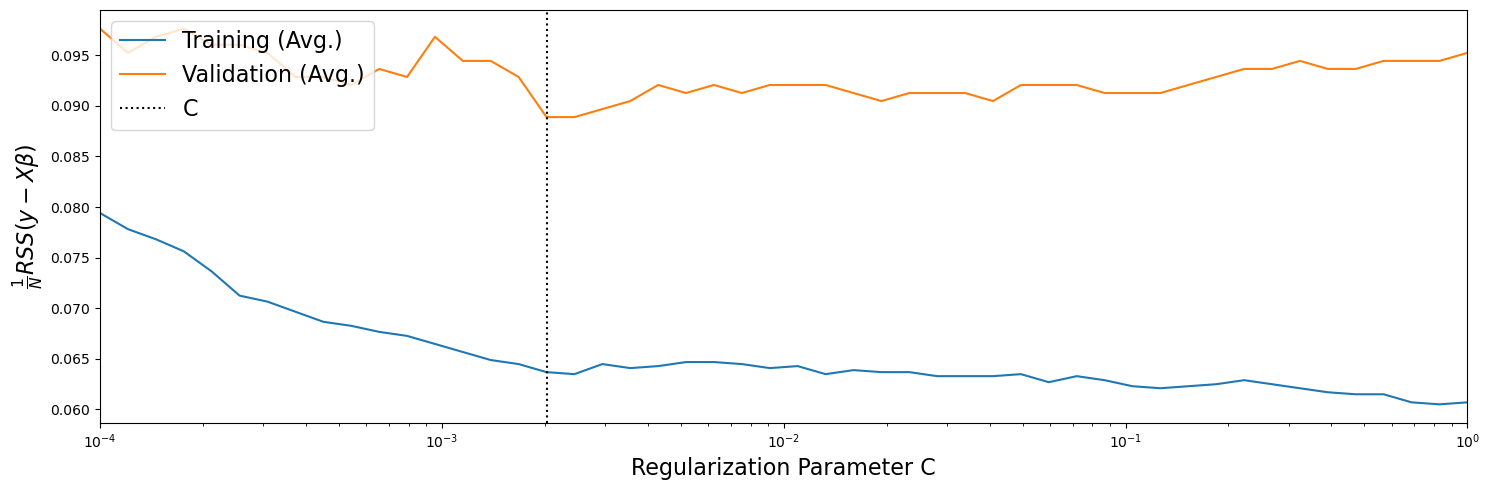

In [75]:
regSVC = svm.LinearSVC(C=0.001,max_iter=10000000,tol=0.001)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

param_grid = [{'C': np.logspace(-4,0,50)}]

cv_regSVC = GridSearchCV(regSVC, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_regSVC.fit(X_train,y_train)
cvOptC = cv_regSVC.cv_results_['param_C'][cv_regSVC.best_index_]

testedC = cv_regSVC.cv_results_['param_C']
trainScores = -cv_regSVC.cv_results_['mean_train_score']
testScores = -cv_regSVC.cv_results_['mean_test_score']

plt.figure(figsize=(15,5))
plt.plot(testedC, trainScores, '-', label='Training (Avg.)')
plt.plot(testedC, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter C', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptC, label='C', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([1e-4, 1])
plt.tight_layout()
plt.legend(loc=2, fontsize=16)

log_regSVC_opt = svm.LinearSVC(C=cvOptC)

log_regSVC_opt.fit(X_train,y_train)
score_regSVC_opt = log_regSVC_opt.score(X_test,y_test)
print(f'The accuracy of the Hinge Classifier and optimal parameter C is {score_regSVC_opt}') 
print(f'The optimal parameter C is {cvOptC}, thus the optimal lambda is {1/cvOptC}') 

## 4) Random forest

In [76]:
from sklearn import ensemble

In [85]:
# Create estimator object
reg_rf = ensemble.RandomForestRegressor(n_estimators=10)

# Fit estimator to training data
reg_rf.fit(X_train, y_train)
score_rf=reg_rf.score(X_test, y_test)

print(f'The accuracy of the random forest is {score_rf}') 

SyntaxError: invalid syntax (2499012297.py, line 8)

In [86]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


param_grid = [{'n_estimators': np.logspace(1, 4, 20,dtype=int)}]

In [87]:
cv_rf = GridSearchCV(reg_rf, param_grid, scoring = neg_rss, cv=cv,return_train_score=True)

In [88]:
cv_rf.fit(X_train,y_train)

KeyboardInterrupt: 

In [84]:
cvOptn = cv_rf.cv_results_['param_n_estimators'][cv_rf.best_index_]

testedn = cv_rf.cv_results_['param_n_estimators']
trainScores = -cv_rf.cv_results_['mean_train_score']
testScores = -cv_rf.cv_results_['mean_test_score']

plt.figure(figsize=(15,5))
plt.plot(testedn, trainScores, '-', label='Training (Avg.)')
plt.plot(testedn, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter n_estimators', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptn, label='n', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([1, 1e4])
plt.tight_layout()
plt.legend(loc=2, fontsize=16)

reg_rf_opt = ensemble.RandomForestRegressor(n_estimators=cvOptn)

reg_rf_opt.fit(X_train, y_train)
score_rf_opt=reg_rf.score(X_test, y_test)

print(f'The accuracy of the Hinge Classifier and optimal parameter C is {score_rf_opt}') 
print(f'The optimal parameter n is {cvOptn}') 

KeyboardInterrupt: 

## Statistical Learning with Nearest-Neighbors